#### Thu. 4 JUL, 2024

In [1]:
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests

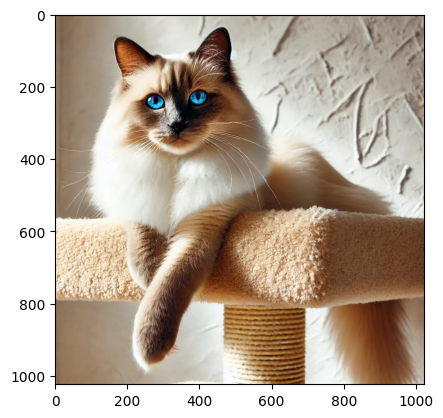

In [2]:
url = 'https://cmu.to/DemoCat'
response = requests.get(url)
if response.status_code != 200:
  print('Error: Image not found.')
  sys.exit(1)

img_bgr = cv2.imdecode(np.frombuffer(response.content, dtype=np.uint8), cv2.IMREAD_COLOR)
if img_bgr is None:
  print('Error: Image not decoded.')
  sys.exit(2)

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb, cmap=None)
plt.show()

In [3]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_rgba = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2RGBA)
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
img_hsv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HSV)

img_yuv = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YUV)
img_lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
img_hls = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2HLS)
img_yCrCb = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2YCrCb)
img_XYZ = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2XYZ)

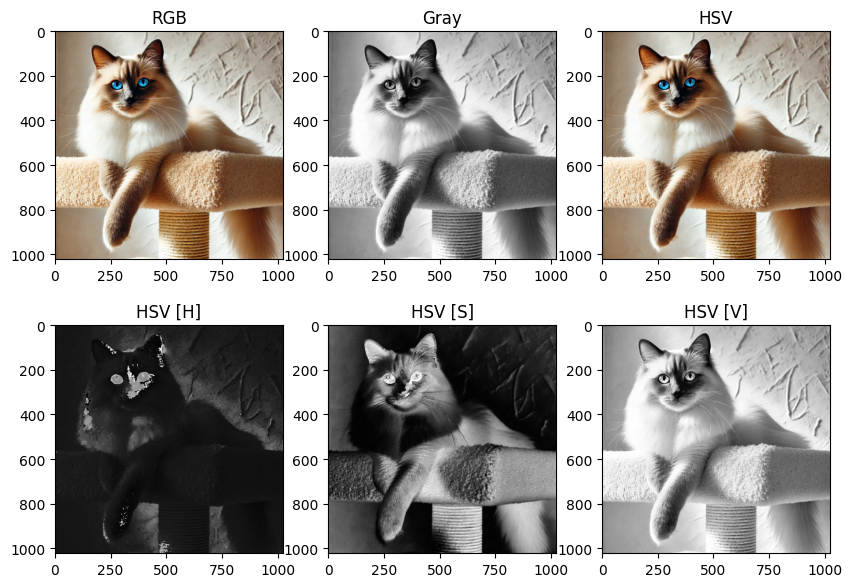

In [4]:
plt.figure(figsize=(10, 7))   # (w, h) in inches.

rows = 2;   cols = 3;   index = 1

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_rgb, cmap=None)
plt.title('RGB')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_gray, cmap='gray')
plt.title('Gray')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB), cmap=None)
plt.title('HSV')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_hsv[:, :, 0], cmap='gray')
plt.title('HSV [H]')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_hsv[:, :, 1], cmap='gray')
plt.title('HSV [S]')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_hsv[:, :, 2], cmap='gray')
plt.title('HSV [V]')

plt.show()

In [5]:
print(f'Image shape: {img_rgba.shape}')

Image shape: (1024, 1024, 4)


In [6]:
img_rgba_backup = img_rgba.copy()

In [7]:
unique_alpha_vals = np.unique(img_rgba[:, :, 3])
print(f'Unique alpha values: {unique_alpha_vals}')

Unique alpha values: [255]


In [8]:
alpha = 128
img_rgba[:, :, 3] = alpha

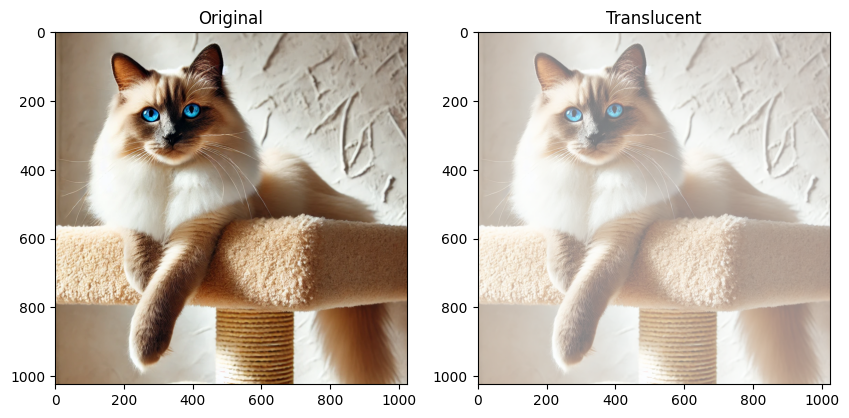

In [9]:
plt.figure(figsize=(10, 7))   # (w, h) in inches.

rows = 1;   cols = 2;   index = 1

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_rgba_backup, cmap=None)
plt.title('Original')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_rgba, cmap=None)
plt.title('Translucent')

plt.show()

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
file_path = '/content/drive/MyDrive/Image Processing/Images/'
file_name = 'DemoCat_Translucent'
file_format = '.png'

img_bgra = cv2.cvtColor(img_rgba, cv2.COLOR_RGBA2BGRA)
cv2.imwrite(file_path + file_name + file_format, img_bgra)

True

#### Tue. 9 JUL, 2024

In [12]:
import sys
import cv2
import numpy as np
from matplotlib import pyplot as plt
import requests

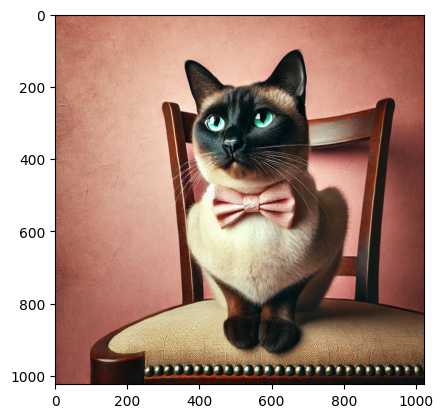

In [13]:
url = 'https://cmu.to/DemoCat2'
response = requests.get(url)
if response.status_code != 200:
  print('Error: Image not found.')
  sys.exit(1)

img_opaque = cv2.imdecode(np.frombuffer(response.content, dtype=np.uint8), cv2.IMREAD_COLOR)
if img_opaque is None:
  print('Error: Image not decoded.')
  sys.exit(2)

img_opaque_rgb = cv2.cvtColor(img_opaque, cv2.COLOR_BGR2RGB)
plt.imshow(img_opaque_rgb, cmap=None)
plt.show()

In [14]:
print(f'Image shape: {img_opaque.shape}')

Image shape: (1024, 1024, 3)


Try loading the saved translucent image from the Google Drive

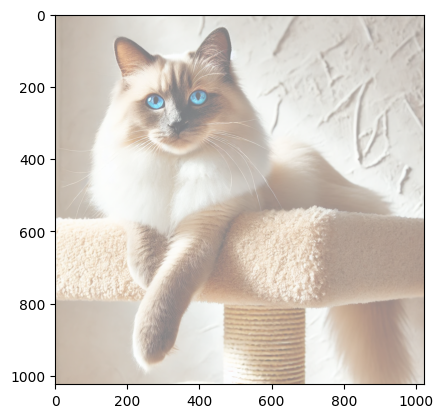

In [15]:
img_translucent = cv2.imread(file_path + file_name + file_format, cv2.IMREAD_UNCHANGED)
if img_translucent is None:
  print('Error: Image not loaded')
  sys.exit(3)

img_translucent_rgba = cv2.cvtColor(img_translucent, cv2.COLOR_BGRA2RGBA)
plt.imshow(img_translucent_rgba, cmap=None)
plt.show()

In [16]:
img_translucent_rgba_resized = cv2.resize(img_translucent_rgba, (img_opaque.shape[1], img_opaque.shape[0]))
# (fx = cols, fy = rows).

Alpha Blending

In [25]:
# Extract the alpha channel from the translucent image.
alpha_channel = img_translucent_rgba_resized[:, :, 3] / 255. # ทำให้มันเป็น float ในช่วง 0-1

# Extract the RGB channels from the translucent image.
rgb_channel = img_translucent_rgba_resized[:, :, :3]

# Perform alpha blending.
img_blended = np.zeros_like(img_opaque_rgb)
for ch in range(3):
   img_blended[:, :, ch] = rgb_channel[:, :, ch] * alpha_channel + img_opaque_rgb[:, :, ch] * (1 - alpha_channel)

cv2.imwrite(file_path+'DemoCat_Blended.png', cv2.cvtColor(img_blended, cv2.COLOR_RGB2BGR))

True

In [26]:
alpha_channel

array([[0.50196078, 0.50196078, 0.50196078, ..., 0.50196078, 0.50196078,
        0.50196078],
       [0.50196078, 0.50196078, 0.50196078, ..., 0.50196078, 0.50196078,
        0.50196078],
       [0.50196078, 0.50196078, 0.50196078, ..., 0.50196078, 0.50196078,
        0.50196078],
       ...,
       [0.50196078, 0.50196078, 0.50196078, ..., 0.50196078, 0.50196078,
        0.50196078],
       [0.50196078, 0.50196078, 0.50196078, ..., 0.50196078, 0.50196078,
        0.50196078],
       [0.50196078, 0.50196078, 0.50196078, ..., 0.50196078, 0.50196078,
        0.50196078]])

In [28]:
alpha = 128
img_rgba[:, :, 3] = alpha

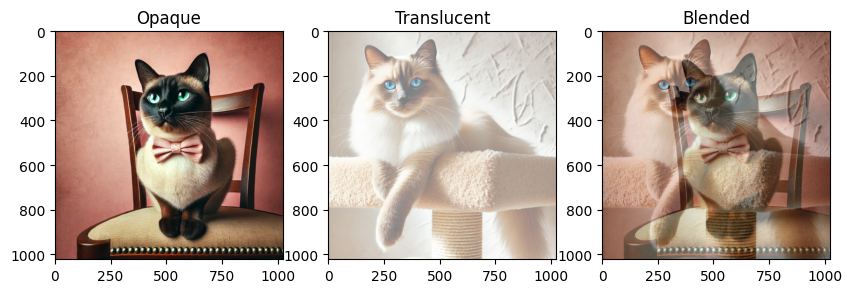

In [30]:
plt.figure(figsize=(10, 7))   # (w, h) in inches.

rows = 1; cols = 3; index = 1;

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_opaque_rgb, cmap=None)
plt.title('Opaque')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_translucent_rgba, cmap=None)
plt.title('Translucent')

plt.subplot(rows, cols, index); index += 1;
plt.imshow(img_blended, cmap=None)
plt.title('Blended')

plt.show()